# Mendownload data dari kaggle

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ayushimishra2809/movielens-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/875k [00:00<?, ?B/s]
100% 875k/875k [00:00<00:00, 22.0MB/s]


##unzip dataset movielens

In [2]:
!unzip /content/movielens-dataset.zip

Archive:  /content/movielens-dataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


#Data Understanding

##1# Mendefinisikan variabel pada data

In [3]:
import pandas as pd
 
movies = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')

print('Jumlah judul movie pada website movielens: ', len(movies.movieId.unique()))
print('Jumlah user yang memberi rating pada website movielens: ', len(rating.userId.unique()))

Jumlah judul movie pada website movielens:  10329
Jumlah user yang memberi rating pada website movielens:  668


##2# Univariate Exploratory Data Analysis

###a# Variabel movies

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
print('Banyak genre: ', len(movies.genres.unique()))
print('Jenis genre yang tersedia: ', movies.genres.unique())

Banyak genre:  938
Jenis genre yang tersedia:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Adventure|Romance|IMAX' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Children|Comedy'
 'Drama|Mystery' 'Drama|Thriller' 'Comedy|Crime' 'Action|Sci-Fi|Thriller'
 'Action|Comedy|Horror|Thriller' 'Comedy|Drama'
 'Action|Crime|Drama|Thriller' 'Crime|Drama|Romance'
 'Action|Adventure

###b# Rating

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [7]:
rating.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [8]:
print('Jumlah userId: ', len(rating.userId.unique()))
print('Jumlah movieI: ', len(rating.movieId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userId:  668
Jumlah movieI:  10325
Jumlah data rating:  105339


##3# Data Preprocessing

###a# Menggabungkan Movie

In [9]:
# menggunakan movieID yang unik sebagai acuan dalam penggabungan ini
import numpy as np
 
# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    movies.movieId.unique(),
    rating.movieId.unique(),
))
 
# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))
 
print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieId:  10329


###b# Menggabungkan User

In [10]:
# Menggabungkan seluruh userId
user_all = rating.userId.unique()

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all)) 
 
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  668


###c# Mengetahui Jumlah Rating

In [11]:
# Menggabungkan file movies ,dan rating ke dalam dataframe movie_info
movie_info = pd.concat([movies, rating])
 
# Menggabungkan dataframe rating dengan movie_info berdasarkan nilai movieId
movie = pd.merge(rating, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,title,genres,userId_y,rating_y,timestamp_y
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,NaN,NaN,NaN
1,1,16,4.0,1217897793,NaN,NaN,1.0,4.0,1.217898e+09
2,1,16,4.0,1217897793,NaN,NaN,9.0,4.0,8.426867e+08
3,1,16,4.0,1217897793,NaN,NaN,12.0,1.5,1.144396e+09
4,1,16,4.0,1217897793,NaN,NaN,24.0,4.0,9.634688e+08
...,...,...,...,...,...,...,...,...,...
6562101,668,144976,2.5,1448656898,NaN,NaN,668.0,2.5,1.448657e+09
6562102,668,148626,4.5,1451148148,The Big Short (2015),Drama,NaN,NaN,NaN
6562103,668,148626,4.5,1451148148,NaN,NaN,458.0,4.0,1.452015e+09
6562104,668,148626,4.5,1451148148,NaN,NaN,576.0,4.5,1.451688e+09


In [12]:
# Cek missing value dengan fungsi isnull()
movie.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
title          6456767
genres         6456767
userId_y        105339
rating_y        105339
timestamp_y     105339
dtype: int64

In [13]:
# Menghitung jumlah rating user berdasarkan movieId
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,userId_y,rating_y,timestamp_y
movieId,,,,,,
1,18144642,211214.5,58348594457940,18066768.0,210308.0,5.809817e+13
2,2893416,28690.5,9196943406591,2862304.0,28382.0,9.098052e+12
3,1026541,10915.0,3233596255210,1009142.0,10730.0,3.178790e+12
4,45240,372.0,127234077648,41470.0,341.0,1.166312e+11
5,1112517,12694.5,3849404128038,1094858.0,12493.0,3.788302e+12
...,...,...,...,...,...,...
146684,1244,8.0,2894913108,622.0,4.0,1.447457e+09
146878,1244,5.0,2895029274,622.0,2.5,1.447515e+09
148238,950,6.0,2902426086,475.0,3.0,1.451213e+09


###d# Menggabungkan dataframe movie dengan rating

In [14]:
# Definisikan dataframe rating ke dalam variabel all_movie_name
all_movie_name = rating
all_movie_name

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [15]:
# Menggabungkan all_movie_name dengan dataframe ratings berdasarkan movieId
all_movie_rate = pd.merge(all_movie_name, rating[['movieId','rating']], on='movieId', how='left')
 
# Print dataframe all_movie_genre
all_movie_rate

,userId,movieId,rating_x,timestamp,rating_y
0,1,16,4.0,1217897793,4.0
1,1,16,4.0,1217897793,4.0
2,1,16,4.0,1217897793,1.5
3,1,16,4.0,1217897793,4.0
4,1,16,4.0,1217897793,3.0
...,...,...,...,...,...
6456762,668,144976,2.5,1448656898,3.5
6456763,668,144976,2.5,1448656898,2.5
6456764,668,148626,4.5,1451148148,4.0
6456765,668,148626,4.5,1451148148,4.5


###e# Menggabungkan dataframe movies dengan all_movie_rate 

In [16]:
# Menggabungkan dataframe genre dengan all_movie_rate dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_rate, movies, on='movieId', how='left')
all_movie

,userId,movieId,rating_x,timestamp,rating_y,title,genres
0,1,16,4.0,1217897793,4.0,Casino (1995),Crime|Drama
1,1,16,4.0,1217897793,4.0,Casino (1995),Crime|Drama
2,1,16,4.0,1217897793,1.5,Casino (1995),Crime|Drama
3,1,16,4.0,1217897793,4.0,Casino (1995),Crime|Drama
4,1,16,4.0,1217897793,3.0,Casino (1995),Crime|Drama
...,...,...,...,...,...,...,...
6456762,668,144976,2.5,1448656898,3.5,Bone Tomahawk (2015),Horror|Western
6456763,668,144976,2.5,1448656898,2.5,Bone Tomahawk (2015),Horror|Western
6456764,668,148626,4.5,1451148148,4.0,The Big Short (2015),Drama
6456765,668,148626,4.5,1451148148,4.5,The Big Short (2015),Drama


#Data Preparation

##1# Cek Missing Value

In [17]:
# Mengecek missing value pada dataframe all_movie
all_movie.isnull().sum()

userId       0
movieId      0
rating_x     0
timestamp    0
rating_y     0
title        0
genres       0
dtype: int64

##2# Menyamakan Jenis movie

In [18]:
# buat variabel baru bernama fix_movie untuk menyimpan dataframe

# Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = all_movie.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating_x,timestamp,rating_y,title,genres
6328811,663,1,3.0,851580006,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5409394,571,1,5.0,859156007,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5409395,571,1,5.0,859156007,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5409396,571,1,5.0,859156007,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5409397,571,1,5.0,859156007,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
5527587,576,148626,4.5,1451687664,4.0,The Big Short (2015),Drama
4368467,458,148626,4.0,1452014749,4.0,The Big Short (2015),Drama
4368468,458,148626,4.0,1452014749,4.5,The Big Short (2015),Drama
6456766,668,148626,4.5,1451148148,4.5,The Big Short (2015),Drama


In [19]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

10325

In [20]:
# Mengecek kategori genre di tiap judul film
fix_movie.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

###a# tahap persiapan

In [21]:
# Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating_x,timestamp,rating_y,title,genres
6328811,663,1,3.0,851580006,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4976553,532,1,3.0,1440345516,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4976552,532,1,3.0,1440345516,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4976551,532,1,3.0,1440345516,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4976527,532,1,3.0,1440345516,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
5527588,576,148626,4.5,1451687664,4.5,The Big Short (2015),Drama
5527587,576,148626,4.5,1451687664,4.0,The Big Short (2015),Drama
4368467,458,148626,4.0,1452014749,4.0,The Big Short (2015),Drama
4368468,458,148626,4.0,1452014749,4.5,The Big Short (2015),Drama


In [22]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating_x,timestamp,rating_y,title,genres
6328811,663,1,3.0,851580006,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1411597,160,2,4.0,902696540,3.5,Jumanji (1995),Adventure|Children|Fantasy
3594231,394,3,4.0,845891599,3.0,Grumpier Old Men (1995),Comedy|Romance
5436653,575,4,2.0,939976471,1.5,Waiting to Exhale (1995),Comedy|Drama|Romance
2144028,226,5,5.0,857755360,2.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
6021593,622,146684,4.0,1447456554,4.0,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
6021594,622,146878,2.5,1447514637,2.5,Le Grand Restaurant (1966),Comedy
4567744,475,148238,3.0,1451213043,3.0,A Very Murray Christmas (2015),Comedy
6456764,668,148626,4.5,1451148148,4.0,The Big Short (2015),Drama


###b# konversi data series menjadi list

In [23]:
# Mengonversi data series movieId menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()
 
print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

10325
10325
10325


###c# Membuat dictionary dengan nama id, movie_name, dan genre

In [24]:
# Membuat dictionary untuk data movie_id, movie_name, dan movie_genre
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre 
    })
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10320,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10321,146878,Le Grand Restaurant (1966),Comedy
10322,148238,A Very Murray Christmas (2015),Comedy
10323,148626,The Big Short (2015),Drama


#Model Development

##a# Model Content Based Filtering

In [25]:
# cek lagi data yang kita miliki dan assign dataframe dari tahap sebelumnya ke dalam variabel data

data = movie_new
data.sample(5)

,id,movie_name,genre
8222,71108,"White Ribbon, The (Das weiße Band) (2009)",Drama|Mystery
2393,2992,Rawhead Rex (1986),Horror|Thriller
9577,99996,It's a Disaster (2012),Comedy|Drama
383,435,Coneheads (1993),Comedy|Sci-Fi
5774,8748,"Yesterday, Today and Tomorrow (Ieri, oggi, dom...",Comedy


###1# TF-IDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(data['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

In [27]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(10325, 24)

In [28]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.40402049, 0.53943894, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50526447, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [29]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama movie
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.movie_name
).sample(24, axis=1).sample(10, axis=0)

,crime,fantasy,thriller,imax,animation,sci,romance,western,action,war,...,fi,drama,adventure,musical,mystery,horror,no,children,listed,genres
movie_name,,,,,,,,,,,,,,,,,,,,,
Cecil B. DeMented (2000),0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
City Streets (1931),0.389537,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"Little Foxes, The (1941)",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
"Apprenticeship of Duddy Kravitz, The (1974)",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.629253,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Bad Company (2002),0.649917,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.608900,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Staying Alive (1983),0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.336409,0.0,0.845095,0.0,0.000000,0.0,0.0,0.0,0.0
Phantasm IV: Oblivion (1998),0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0
"Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997)",0.000000,0.456628,0.000000,0.0,0.519589,0.426278,0.0,0.0,0.340232,0.0,...,0.426278,0.205754,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Performance (1970),0.696820,0.000000,0.598809,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.394804,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


###2# Cosine Similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.79962182, 0.15894611, ..., 0.26383816, 0.        ,
        0.        ],
       [0.79962182, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15894611, 0.        , 1.        , ..., 0.60243793, 0.        ,
        0.        ],
       ...,
       [0.26383816, 0.        , 0.60243793, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [31]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_name'], columns=data['movie_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10325, 10325)


movie_name,D.O.A. (1950),"Navigators, The (2001)","Aristocrats, The (2005)",Galaxy Quest (1999),El Cid (1961)
movie_name,,,,,
Bicentennial Man (1999),0.059135,0.179696,0.000000,0.662632,0.265075
Glory Daze (1995),0.207078,0.629253,0.000000,0.000000,0.252388
"Thousand Clowns, A (1965)",0.090781,0.696683,0.239567,0.180766,0.406927
Tall Story (1960),0.000000,0.777201,0.442445,0.333848,0.000000
Princess Mononoke (Mononoke-hime) (1997),0.047997,0.145850,0.000000,0.224114,0.427721
Gone (2012),0.113985,0.346368,0.000000,0.000000,0.138925
8 Seconds (1994),0.207078,0.629253,0.000000,0.000000,0.252388
"Snapper, The (1993)",0.130305,1.000000,0.343868,0.259467,0.158816
Mars Needs Moms (2011),0.000000,0.155914,0.088759,0.600902,0.258733


###3# Mendapatkan Rekomendasi

In [32]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=data[['movie_name', 'genre']], k=5):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_movie : tipe data string (str)
                Nama Movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [33]:
data[data.movie_name.eq('Toy Story (1995)')]

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
# Mendapatkan rekomendasi movie yang mirip dengan Four Rooms (1995)
movie_recommendations('Toy Story (1995)')

,movie_name,genre
0,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
1,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy
2,"Boxtrolls, The (2014)",Adventure|Animation|Children|Comedy|Fantasy
3,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
4,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy


##b# Model Collaborative Filtering

###1# Data Understanding

In [35]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [36]:
# Membaca dataset
 
df = rating
df

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


###2# Data Preparation

In [37]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)
 
# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [38]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
 
# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [39]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

In [40]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

668
10325
Number of User: 668, Number of Movie: 10325, Min Rating: 0.5, Max Rating: 5.0


##3# Membagi Data untuk Training dan Validasi

In [41]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
41032,285,2605,3.0,974036328,284,1575
1938,24,897,4.0,963472695,23,1118
92480,607,4016,4.0,979339130,606,318
30160,219,3981,2.0,1011718777,218,2522
28079,203,546,2.0,955137146,202,407
...,...,...,...,...,...,...
54886,402,780,2.5,1172355892,401,34
76820,541,2334,4.0,1004508382,540,2489
103694,668,55288,2.5,1242489706,667,2733
860,11,377,3.0,850815719,10,19


In [42]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 284 1575]
 [  23 1118]
 [ 606  318]
 ...
 [ 667 2733]
 [  10   19]
 [ 127 1983]] [0.55555556 0.77777778 0.77777778 ... 0.44444444 0.55555556 0.55555556]


###4# Proses Training

In [43]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [44]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [45]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 50,
    steps_per_epoch=64,
    validation_data = (x_val, y_val)
)

Epoch 1/50
64/64 [==============================] - 11s 57ms/step - loss: 0.6933 - root_mean_squared_error: 0.2872 - val_loss: 0.6916 - val_root_mean_squared_error: 0.2855
Epoch 2/50
64/64 [==============================] - 3s 44ms/step - loss: 0.6902 - root_mean_squared_error: 0.2842 - val_loss: 0.6883 - val_root_mean_squared_error: 0.2826
Epoch 3/50
64/64 [==============================] - 2s 25ms/step - loss: 0.6856 - root_mean_squared_error: 0.2829 - val_loss: 0.6844 - val_root_mean_squared_error: 0.2791
Epoch 4/50
64/64 [==============================] - 3s 45ms/step - loss: 0.6816 - root_mean_squared_error: 0.2764 - val_loss: 0.6802 - val_root_mean_squared_error: 0.2754
Epoch 5/50
64/64 [==============================] - 2s 25ms/step - loss: 0.6766 - root_mean_squared_error: 0.2801 - val_loss: 0.6749 - val_root_mean_squared_error: 0.2706
Epoch 6/50
64/64 [==============================] - 3s 44ms/step - loss: 0.6713 - root_mean_squared_error: 0.2664 - val_loss: 0.6678 - val_root_

##Visualisasi Metrik

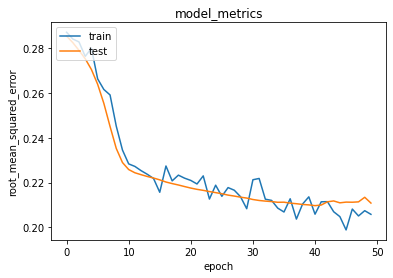

In [46]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###5# Mendapatkan Rekomendasi Movie

In [47]:
movie_df = movie_new
df = pd.read_csv('ratings.csv')
 
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
 
movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [48]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 10)
print('movie with high ratings from user')
print('----' * 9)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)
 
print('----' * 10)
print('Top 10 movie recommendation')
print('----' * 9)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

Showing recommendations for users: 560
movie with high ratings from user
------------------------------------
Scream (1996) : Comedy|Horror|Mystery|Thriller
Benny & Joon (1993) : Comedy|Romance
Grosse Pointe Blank (1997) : Comedy|Crime|Romance
Dangerous Liaisons (1988) : Drama|Romance
Superman (1978) : Action|Adventure|Sci-Fi
----------------------------------------
Top 10 movie recommendation
------------------------------------
Godfather: Part II, The (1974) : Crime|Drama
Full Metal Jacket (1987) : Drama|War
Henry V (1989) : Action|Drama|Romance|War
Amadeus (1984) : Drama
Annie Hall (1977) : Comedy|Romance
Boot, Das (Boat, The) (1981) : Action|Drama|War
Sting, The (1973) : Comedy|Crime
Dead Poets Society (1989) : Drama
Graduate, The (1967) : Comedy|Drama|Romance
Bridge on the River Kwai, The (1957) : Adventure|Drama|War
